# Notæ 8

# Incidencia de cotas primales en la resolución de PLE


**AGREGAR UNA INTRODUCCIÓN**

## 1. Eliminación de soluciones simétricas


**AGREGAR UNA INTRODUCCIÓN**

Otra forma de reducir el tiempo de optimización es reducir el espacio de búsqueda, durante la exploración de nodos del árbol B&B.
Decimos que un conjunto de soluciones $s_1$, $s_2$, ..., $s_n$ son simétricas si tienen el mismo valor objetivo. Observemos que podemos eliminar $s_2$, ..., $s_n$ sin afectar el resultado de la optimización. En el caso del problema de coloreo, esto equivale a eliminar soluciones con misma cantidad de colores.

Para eliminarlas, incorporamos nuevas restricciones a la formulación. Por ejemplo, en COL habíamos incorporado $(COL.3)$ para eliminar ciertas soluciones innecesarias. 

Ahora vamos a considerar distintas familias de desigualdades que eliminan soluciones simétricas, propuestas por I.$~$Méndez-Díaz y P.$~$Zavala. Supongamos que los colores están enumerados $\mathcal{C}=1,\ldots,c$:
- Orden en la cantidad de colores: Claramente una solución que utilice los colores de un subconjunto de tamaño $k$  de $\mathcal{C}$ usa la misma cantidad de colores que otra a la que se le asignan colores de $1,\ldots,k$ (por ejemplo, para una solución que utilice los colores $3,5,8$ existe otra que utiliza $1,2,3$). Podemos eliminar estas soluciones adicionales agregando:
$$w_k \geq w_{k+1},~~ \forall~ k = 1,\ldots,c-1~~~~~~(S1)$$
- Orden en los cardinales de los colores: Observemos que, para una solución que utiliza los colores $1,\ldots,k$, existen otras $k!-1$ soluciones simétricas en donde se hizo una permutación de sus colores. Podemos eliminar parcialmente estas soluciones si imponemos que los primeros colores tengan mayor cardinal que los últimos. Es decir, si $V_i$ representa a aquellos vértices pintados de $i$, podemos restringirnos a soluciones donde $|V_1| \geq |V_2| \geq ... \geq |V_k|$ con:
$$\sum_{v \in V} x_{vk} \geq \sum_{v \in V} x_{vk+1},~~ \forall~ k = 1,\ldots,c-1~~~~~~(S2)$$
- Eliminación de indistinguibles I: Teniendo en cuenta una enumeración de los vértices ($v_1$, $v_2$, ...) podemos, sin perder generalidad, imponer que el primer vértice sea coloreado con el primer color. Luego $v_2$ puede, o bien utilizar el mismo color, o bien uno nuevo, por lo que le permitimos colorearse con colores 1 o 2. En otras palabras, $v_1$ no se puede colorear con $\{2,\ldots,c\}$, $v_2$ no lo puede hacer con $\{3,\ldots,c\}$, etc. Siguiendo esta lógica proponemos:
$$x_{v_i k} = 0,~~ \forall~ k=i+1,\ldots,c,~ \forall~i=1,\ldots,c-1~~~~~~(S3)$$
Estas restricciones no son compatibles con $(S2)$.
- Eliminación de indistinguibles II: Dejamos al lector entender el significado de estas desigualdades que, junto con $(S1)$ y $(S3)$, eliminan todas las $k!-1$ soluciones simétricas:
$$\sum_{j=k-1}^{i-1} x_{u_jk-1} \geq x_{v_ik}~~ \forall~ i=k+1,\ldots,c,~ \forall~k=2,\ldots,c-1~~~~~~(S4)$$

### &#x1f4bb; Actividad 1

- Incorpore las restricciones que eliminan simetrías a la formulación. Llamémoslas:
  - $COL_1$: Formulación original
  - $COL_2$: $COL_1$ + $(S1)$ (Orden en la cantidad de colores)
  - $COL_3$: $COL_2$ + $(S2)$ (Orden en los cardinales de los colores)
  - $COL_4$: $COL_2$ + $(S3)$ (Eliminación de indistinguibles I)
  - $COL_5$: $COL_4$ + $(S4)$ (Eliminación de indistinguibles II)
- Para grafos con densidades de 10%, 50% y 90%, ¿hasta qué cantidad de vértices es posible resolver una instancia con las formulaciones dadas (por densidad) para un tiempo límite de 5 minutos? Concluya cuáles de las restricciones que eliminan simetrías conviene considerar.

## 2. Power Dominating Set Problem

En esta sección, seguiremos como caso de estudio un problema de optimización que proviene del monitoreo de redes eléctricas. Una red eléctrica se puede representar mediante un grafo, donde los vértices se corresponden con subestaciones eléctricas y las aristas con líneas de transmición. Existen unos aparatos, llamados phasor measurement units (PMUs), que permiten medir ciertas magnitudes, por ejemplo corrientes, sobre la red casi en tiempo real. Un PMU se instala en un vértice de la red y permite monitorear localmente la red, es decir, a la vecinidad cerrada del vértice y a las aristas que inciden en él. El alto costo de estos dispositivos motiva el problema de optimización de ubicar el menor número de PMUs de forma tal que todos los vértice estén monitoreados. Así descripto, se puede modelar como un problema de conjunto dominante (dominating set problem), donde un conjunto dominate $S$ representa el subconjunto de vértices donde se ubican los PMUs. 


Sin embargo, a partir de algunas leyes eléctricas, en particular las leyes de Kirchhoff, es posible inferir algunas mediciones sin monitorearlas directamente con un PMU. Por ejemplo, si un vértice $u$ está monitoreado y todos los vecinos de $u$, salvo un vértice $v \in N(u)$, están monitoreados, entonces es posible medir de forma indirecta las corrientes en $v$, es decir, $v$ se vuelve monitoreado. En consecuencia, estas mediciones indirectas pueden reducir el número de PMUs necesarios para monitorear a toda la red. Esto da origen a una variación del problema de conjunto dominante, denominado *problema de conjunto dominante energético*, o más conocido en inglés, *power dominating set problem*. Formalicemos estas ideas.


**Definición.** Dado un grafo $G=(V,E)$ y un subconjunto $S \subset V$, $S$ es un **power dominating set** de $G$ si $S$ *monitorea* a todos los vértices de $G$. Las siguientes dos reglas, que se aplican iterativamente, determinan la si un vértice está monitoreado.
* **Regla de dominación.** Un vértice está monitoreado si está en la vecinidad cerrada de un vértice de $S$.
* **Regla de propagación.** Si un vértice $u$ está monitoreado y $v \in N(u)$ es el único vecino de $u$ que aún no está monitoreado, entonces $v$ se vuelve monitoreado.

Con esta definición, podemos formalizar nuestro problema de optimización.

**Power Dominating Set Problem (PDS).**</br>
**Entrada:** Un grafo $G$.</br>
**Objetivo:** Hallar un power dominating set $S$ de $G$ de cardinal mínimo.

**Notación.** Dado un grafo de $G$, $\gamma(G)$ y $\gamma_P(G)$ simbolizan el cardinal mínimo de un conjunto dominante y de un conjunto dominante energético de $G$, respectivamente.

Es fácil ver que todo conjunto dominante $S$ de $G$ es también un conjunto dominante energético de $G$, debido a que $S$ domina (monitorea) todos los vértices del grafo únicamente aplicando reglas de dominación. En consecuencia, tenemos el sigueinte lema.

**Lema.** Dado un grafo $G$, $\gamma_P(G) \leq \gamma(G)$.

**Ejemplo.** Consideremos el siguiente grafo $G$.

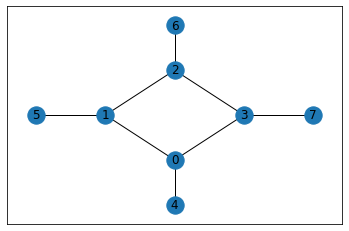

In [1]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (2,3), (3,0), (0,4), (1,5), (2,6), (3,7)])

coordenadas = {0: (2,1), 1: (1,2), 2: (2,3), 3: (3,2), 4: (2,0), 5: (0,2), 6: (2,4), 7: (4,2)}
nx.draw_networkx(G, pos=coordenadas)

Intentemos encontrar un power dominating set para este grafo. Pensando de forma greedy, nos conviene agregar a $S$ un vértice con grado alto, pues nos permitirá monitorear por regla de dominación un mayor número de vecinos. Probemos $S = \{0\}$. Por regla de dominación, quedan monitoreados los vértices de $N[0] = \{0,1,3,4\}$. 

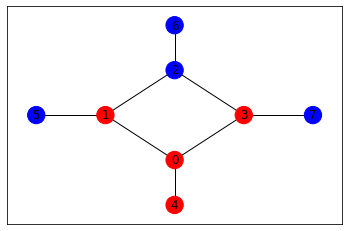

In [2]:
colores = ["red" if v in [0,1,3,4] else "blue" for v in G]
nx.draw_networkx(G, pos=coordenadas, node_color=colores)

En este punto no es posible seguir. No podemos aplicar reglas de propagación porque tanto el vértice 1 como el 3, tienen excactamente dos vecinos sin monitorear. 
Para poder seguir, tenemos que agregar otro vértice a $S$. Siguiendo con nuestro pensamiento greeedy, nos conviene agregar un vértice de grado alto en el subgrafo inducido por los vértices no monitoreados. 
Probemos agregar el vértice 2, es decir, $S = \{0,2\}$. Por regla de dominación, quedan monitoreados los vértices de $\{2,6\} \subset N[2]$. 

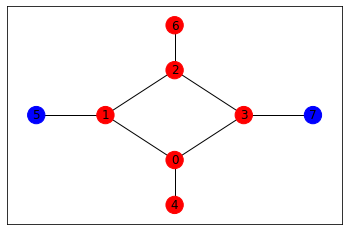

In [3]:
colores = ["red" if v in [0,1,3,4,2,6] else "blue" for v in G]
nx.draw_networkx(G, pos=coordenadas, node_color=colores)

Ahora bien, tanto el vértice 1 como el 3 están monitoreados y tienen exactamente un vecino sin monitorear. Luego por regla de propagación, 1 monitorea a 5 y 3 monitorea a 7, quedando monitoreado todo el grafo. Por lo tanto, $S = \{0,2\}$ es un power dominating set.

### &#x1f4bb; Actividad 2

1. Completar la demostración del ejemplo anterior. Probar que $S = \{0,2\}$ es un power dominating set de cardinal mínimo.
2. Para cada uno de los siguientes grafos $H$, hallar $\gamma(H)$ y $\gamma_P(H)$: (i) Grafo completo $K_n$, con $n \geq 1$, (ii) Grafo camino $P_n$, con $n \geq 1$, (iii) Grafo cíclico $C_n$, con $n \geq 3$. 

### Formulación de PLE para el PDS

Usaremos la formulación de PLE propuesta por Brimkov, Mikesell y Smith (2019), https://doi.org/10.1007/s10878-019-00380-7 (sección 6.1).

Esta formulación, incorpora una dimensión temporal para saber cuándo un vértice se empieza a monitorear (recordar que la aplicación de la regla de propagación involucra saber si un vértice está monitoreado o no en un instante de tiempo dado). Asumamos el tiempo discretizado por un conjunto $\mathcal T = \{0, \ldots, T\}$, con $T = |V|$. Volviendo al ejemplo de arriba, podemos pensar que los vértices de $S = \{0,2\}$ se monitorean en el instante de tiempo inicial $t = 0$. Luego, la vecindad de $S$, es decir $N(S) = \{1,3,4,6\}$, se monitorea por regla de dominación en el instante de tiempo $t = 1$. Finalmente, los vértices 5 y 7 se monitorean por regla de propagación en el instante de tiempo $t = 2$ (acá es importante notar, que 1 puede monitorear a 5 por regla de propagación porque él mismo y todos sus vecinos salvo 5 se monitorean en un instante de tiempo $t < 2$, y análogamente se justifica por qué 3 puede monitorear a 7).

La formulación de PLE tiene tres tipos de variables:
* Para todo vértice $v \in V$, la variable binaria $s_v = 1$ si y sólo si $v \in S$.
* Para todo vértice $v \in V$, la variable entera $x_v \in \mathcal T$ representa en el instante de tiempo en que $v$ es monitoreado.
* Para toda arista dirigida $e = (u,v) \in \overrightarrow{E}$, la variable binaria $y_e = 1$ si $u$ monitorea a $v$ (por regla de dominación o propagación). Notar que necesitamos considerar ambas direcciones de la arista para saber en qué dirección se propaga el monitoreo.

Volviendo al ejemplo de arriba, las variables podrían asumir los siguientes valores:
* $s_0 = s_2 = 1$, las demás estan apagadas.
* $x_0 = x_2 = 0$, $x_1 = x_3 = x_4 = x_6 = 1$, $x_5 = x_7 = 2$.
* $y_{01} = y_{03} = y_{04} = y_{26} = y_{15} = y_{37} = 1$, las demás están apagadas. Notar que estos valores nos dicen que, en particular, los vértices 1 y 3 están monitoreados por 0, y no por 2, que también esté en condiciones de monitorearlos, pero esto está ok porque es suficiente con que cada vértice se monitoree exactamente una vez (de hecho, las restricciones del modelo lo forzarán).

Ya estamos en condiciones de presentar la formulación de PLE:

\begin{align*}
& \min \sum_{v \in V} s_v & \\
\text{s.a.}\ \ \ & x_u + \sum_{v \in N(u)} y_{vu} = 1 & \forall\ v \in V. \tag{1}\\
& x_u - x_v + (T+1)y_e \leq T & \forall\ e = (u,v) \in \overrightarrow{E}. \tag{2}\\
& x_w - x_v + (T+1)y_e \leq T + (T+1)s_u & \forall\ e = (u,v) \in \overrightarrow{E},\ w \in N(u) \setminus \{v\}. \tag{3}\\
& x \in \mathcal T^{T},\ y \in \{0,1\}^{|V|},\ s \in \{0,1\}^{|V|}. 
\end{align*}

La función objetivo consiste en minimizar el cardinal de $S$. Las restricciones (1) fuerzan a que todo vértice $u$ cumpla exactamente una de las siguientes condiciones: $u \in S$ o exactamente un vecino de $u$ lo monitorea. Las restricciones (2) obligan a que $x_u + 1 \leq x_v$, es decir, que $v$ se monitoree en un instante de tiempo posterior al instante de tiempo en que se monitorea $u$, cuando $u$ monitorea a $v$ (por regla de dominación o propagación). Notar que estas restricciones no imponen restricción alguna cuando $y_{uv} = 0$ y en la literatura se las conoce como restricciones *big-M*. Las restricciones (3) obligan a que, para todo vecino $w$ de $u$ distinto de $v$, $x_w + 1 \leq x_v$, es decir, que $v$ se monitoree en un instante de tiempo posterior al instante de tiempo en que se monitorea $w$, cuando $u \notin S$ y $u$ monitorea a $v$ (por regla de propagación). Otra vez, estas restricciones no imponen restricción alguna cuando $y_{uv} = 0$ o $s_u = 1$.

### Resolución con CPLEX

A continuación, vamos a implementar funciones de Python que permitan resolver esta formulación con CPLEX. Para simplificar la implementación tendremos en cuenta dos puntos:

* Las restricciones (3) dependen de las aristas dirigidas de $G$. Para escribirlas más fácil, será conveniente construir el digrafo $D$ asociado a $G$, es decir, con mismo conjunto de vértices y aristas en ambas direcciones para cada arista de $G$. Por suerte, <code>networkx</code> ya provee una función para hacer esto. Directamente llamaremos al método <code>to_directed</code> de la clase <code>Graph</code>.
* Las variables $y$ están indexadas por aristas dirigidas, con lo cual surge la pregunta: ¿qué estructura usaremos para almacenarlas? Por ejemplo, si las guardamos en una lista de Python, dado que las listas se indexan por números naturales, necesitaremos un mapeo (función biyectiva) de números naturales a aristas dirgidas que nos diga en que índice de la lista está guardada la variable correspondiente. Esto puede ser un poco incómodo. Otra alternativa es guardar las variables $y$ en una matriz de dimensión $|V| \times |V|$. Este enfoque tampoco es demasiado elegante, porque la matriz tendrá algunas entradas vacías, específicamente para todo par de vértices no adyacentes. Optaremos por una alternativa más comoda, guardando las variables $y$ en un diccionario de Python. La ventaja de este enfoque es que los dicciones se pueden indexar por pares ordenados, es decir, por aristas dirigidas. Nuestro diccionario tendrá la siguiente forma:
$$\{ (0,1): y_{01}, (0,3): y_{03}, \ldots \},$$
es decir, un mapeo de aristas dirigidas a variables. En Python es posible construir un diccionario por comprensión, de una manera muy similar a la forma de construir listas por comprensión. Además, los diccionarios se indexan de la misma forma que la listas. Por ejemplo, siendo <code>Y</code> la variable de Python que almacena el diccionario, entonces <code>Y[(u,v)]</code> almacena la variable $y_{uv}$.

In [4]:
from docplex.mp.model import Model

def construir_modelo_PDSBrimkov(G):
    
    modelo = Model(name='PDS-Brimkov') # Inicializamos el modelo 
    
    # Instantes de tiempo
    T = G.number_of_nodes()
    
    # Digrafo (con aristas dirigidas) asociado a G
    D = G.to_directed()
    
    # Variables
    S = [modelo.binary_var(name='s_' + str(v)) for v in G]
    X = [modelo.integer_var(0, T, name='x_' + str(v)) for v in G]
    Y = {(u,v): modelo.binary_var(name='y_' + str(u) + '_' + str(v)) 
         for u,v in D.edges}

    # Funcion objetivo
    modelo.minimize(modelo.sum(S[v] for v in G))
    
    # Restricciones (1)
    for u in G:
        modelo.add_constraint(S[u] + modelo.sum(Y[(v,u)] for v in G.neighbors(u)) == 1)

    # Restricciones (2)
    for u, v in D.edges:
        modelo.add_constraint(X[u] - X[v] + (T+1)*Y[(u,v)] <= T) 

    # Restricciones (3)
    for u, v in D.edges:
        for w in G.neighbors(u):
            if w == v:
                continue
            modelo.add_constraint(X[w] - X[v] + (T+1)*Y[(u,v)] <= T + (T+1)*S[u])    

    return modelo

def resolver(modelo, log=True): # Por defecto, el log se muestra en pantalla
    
    # Resolvemos el modelo
    sol = modelo.solve(log_output=log)
 
    # Retornamos la solucion
    return sol

Probemos esta implementación en el grafo $G$ que venimos usando de ejemplo. A la hora de mostrar la solución, tener en cuenta que no aparecen las variables en 0. Es decir, no se muestran las variables $x$ asociadas a vértices que se observen en el instante de tiempo $t = 0$.

In [5]:
modelo = construir_modelo_PDSBrimkov(G)
sol = resolver(modelo)
sol.display()

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 8.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 2 times.
Aggregator did 4 substitutions.
Reduced MIP has 44 rows, 28 columns, and 160 nonzeros.
Reduced MIP has 20 binaries, 8 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.12 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 44 rows, 28 columns, and 160 nonzeros.
Reduced MIP has 20 binaries, 8 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.13 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Clique table members: 12.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.00 sec. (0.05 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer

## 3. Cotas primales

En esta sección aprenderemos a proveerle a CPLEX cotas primales. 

Seguiremos el caso de estudio del PDS. Un cota primal sencilla para este problema se deriva del lema que vimos más arriba: $\gamma_P(G) \leq \gamma(G)$. Luego, podemos complementar nuestras implementaciones con el siguiente preprocesamiento: buscar un conjunto dominante de cardinal mínimo y proveerle esta información a CPLEX. 

Para buscar un conjunto dominante de cardinal mínimo podemos usar un algoritmo específico o usar CPLEX para resolver una formulación de PLE para este problema. No obstante, no hay que olvidar que este problema es NP-difícil en grafos generales, por lo que no podemos esperar resolver cualquier instancia en un tiempo razonable.

Sin embargo, a los fines de derivar una cota primal, nos basta con hallar cualquier conjunto dominante, no necesariamente mínimo, pero idealmente minimal (obviamente su cardinal será mayor o igual a $\gamma(G)$). Hallar un conjunto dominante es un problema mucho más fácil que hallar uno de cardinal mínimo. Un algoritmo intuitivo para resolverlo consiste en seguir una estrategia greedy, es decir, empezando con un conjunto vacío $D = \emptyset$, en cada iteración agregamos a $D$ el vértice que permita dominar el mayor número de vértices no dominados. 

Para no complicarnos, usaremos la función <code>dominating_set</code> provista por <code>networkx</code>. Vale la pena volver a aclarar que esta función nos devuelve un conjunto dominante minimal, no necesariamente mínimo.

CPLEX dispone de dos mecanismos para pasar esta clase de cotas primales:
1. **Cutoff.** Consiste en darle el cardinal del conjunto dominante como una cota superior. Así CPLEX puede usar esta cota para podar nodos desde el arranque.
2. **MIP start.**  Consiste en darle el conjunto dominante en términos de las variables del modelo. Es decir, un valor númerico asociado a cada variable. En este caso, además de usar su valor objetivo como una cota superior, CPLEX también puede usar el valor de las variables para intentar encontrar mejores soluciones factibles (con sus propias heurística de refinación de soluciones factibles).

Obviamente el primer mecanismo es más rápido de implementar, pero no explota por completo el gran potencial de CPLEX. Por el contrario, el segundo mecanismo es mucho más recomendable, pero requiere poder traducir, en este caso, un conjunto dominante, en términos de las variables $s$, $x$ e $y$. Esta traducción mucha veces no es trivial.

Antes de seguir, vamos a volver a hablar de la artillería de CPLEX. Como ya mencionamos en el notebook anterior, CPLEX es un solver muy potente y dispone de heurísticas propias para hallar soluciones factibles. Para evitar que estos mecanismos propios del solver generen ruido en nuestros experimentos, procederemos a apagarlos.

In [6]:
def apagar_artilleria(modelo):
    # Apagamos las heurísticas de CPLEX
    modelo.parameters.mip.strategy.heuristiceffort = 0
    # Modo determinista: Siempre que ejecutemos una misma entrada, CPLEX tomará las mismas decisiones
    # Esto nos permite volver a reproducir un experimiento y que los resultados no cambien demasiado
    modelo.parameters.parallel = 1

### Cutoff

A continuación, mostraremos cómo usar el mecanismo de cutoff. Haremos uso del parámetro <code>uppercutoff</code> de CPLEX y setearemos su valor con el cardinal del conjunto dominante hallado por <code>dominating_set</code>.

In [7]:
# Trabajamos con un grafo aleatorio
G = nx.erdos_renyi_graph(20, 0.5, seed=0)

# Construimos el modelo
modelo = construir_modelo_PDSBrimkov(G)
apagar_artilleria(modelo) # Apagamos las heurísticas de CPLEX

# Buscamos un conjunto dominante
D = nx.dominating_set(G)

# Seteamos el parámetro uppercutoff
modelo.parameters.mip.tolerances.uppercutoff(len(D))

# Resolvemos el modelo
sol = resolver(modelo)

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Parallel                                1
CPXPARAM_MIP_Tolerances_UpperCutoff              5
CPXPARAM_MIP_Strategy_HeuristicEffort            0
Tried aggregator 1 time.
Reduced MIP has 1714 rows, 216 columns, and 6796 nonzeros.
Reduced MIP has 196 binaries, 20 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (2.62 ticks)
Probing time = 0.00 sec. (2.42 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 1714 rows, 216 columns, and 6796 nonzeros.
Reduced MIP has 196 binaries, 20 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (3.31 ticks)
Probing time = 0.00 sec. (2.46 ticks)
Clique table members: 108.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.01 sec. (2.56 ticks)

        Nodes                        

Notar que al comienzo del log de CPLEX se muestran los valores de los parámetros a los cuales le cambiamos el valor. En particular, se muestra: </br>
<code>CPXPARAM_MIP_Tolerances_UpperCutoff              5</code></br>
que significa que el conjunto dominante encontrado tiene cardinal 5.

Para problemas de maximización, existe el parámetro <code>lowercutoff</code> de CPLEX.

### MIP start

La traducción de un conjunto dominante $D$ a las variables $s$ es sencilla. Simplemente, para todo vértice $v \in V$, $s_v = 1 \Leftrightarrow v \in D $. Lo que es un poco más complicado es encontrar valores para las variables restantes, $x$ e $y$. 

Es posible diseñar nuestro propio algoritmo que se ocupe de elegir valores para las variables $x$ e $y$ (no debería ser tan complicado). Sin embargo, nos aprovecharemos otra vez de la potencia de CPLEX para simplificar el trabajo. En particular, CPLEX no necesita una solución completa, podemos darle lo que tenemos y delegarle la tarea de encontrar valores para las variables restantes. Obviamente puede ocurrir que CPLEX no sea capaz de completarla, y en esos casos será necesario completarla por nuestros medios. 

Comenzamos definiendo la función <code>setear_mipstart</code> que toma un modelo de PLE, un grafo $G$ y un conjunto dominante $D$, y se ocupa de construir una solución parcial a partir de $D$ y agregarla al modelo. 

In [8]:
def setear_mipstart(modelo, G, D):
    
    # Iniciamos una solución vacía
    sol = modelo.new_solution()
    
    # Recuperamos las variables s del modelo
    S = [modelo.get_var_by_name("s_" + str(v)) for v in G]
    
    # Agregamos valor a las variables
    for v in G:
        if v in D:
            sol.add_var_value(S[v], 1)
        else:
            sol.add_var_value(S[v], 0)
 
    # Agregamos la solución al modelo
    modelo.add_mip_start(sol)

Ahora si ya podemos resolver el modelo.

In [9]:
# Trabajamos con un grafo aleatorio
G = nx.erdos_renyi_graph(20, 0.5, seed=0)

# Construimos el modelo
modelo = construir_modelo_PDSBrimkov(G)
apagar_artilleria(modelo) # Apagamos las heurísticas de CPLEX

# Buscamos un conjunto dominante
D = nx.dominating_set(G)

# Agragamos una solución factible con MIP start
setear_mipstart(modelo, G, D)

# Resolvemos el modelo
sol = resolver(modelo)

Version identifier: 22.1.1.0 | 2022-11-28 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Parallel                                1
CPXPARAM_MIP_Strategy_HeuristicEffort            0
1 of 1 MIP starts provided solutions.
MIP start 'm1' defined initial solution with objective 5.0000.
Tried aggregator 1 time.
Reduced MIP has 1714 rows, 216 columns, and 6796 nonzeros.
Reduced MIP has 196 binaries, 20 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (2.62 ticks)
Probing time = 0.01 sec. (2.42 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 1714 rows, 216 columns, and 6796 nonzeros.
Reduced MIP has 196 binaries, 20 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (3.31 ticks)
Probing time = 0.01 sec. (2.46 ticks)
Clique table members: 108.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.01 sec. (

Observar que el log de CPLEX muestra la siguiente información.</br>
<code>1 of 1 MIP starts provided solutions.</code></br>
<code>MIP start 'm1' defined initial solution with objective 5.0000.</code></br>
Esto quiere decir que CPLEX pudo completar la solución parcial y la solución factible construida tiene valor objetivo igual a 5.

Como dato de color, también se le puede pasar a CPLEX mediante MIP start una solución infactible, y el mismo solver intentará reparar los conflictos.

## 4. Efectividad de cotas primales

Hagamos algunas pruebas computacionales sencillas para visualizar la efectividad de las cotas primales. Vamos a comparar el tiempo de ejecución de CPLEX sobre la formulación de Brimkov sin darle vs. al darle una solución inicial. Usaremos como entrada un grafo aleatorio. En ambos casos apagaremos la artillería de CPLEX vinculada a sus heurísticas.

En primer lugar, definiremos funciones que realicen las instrucciones que fuimos mostrando en este notebook.

In [10]:
def prueba_sin_solucion_inicial(G):
    modelo = construir_modelo_PDSBrimkov(G)
    apagar_artilleria(modelo)
    sol = resolver(modelo, log=False) # Apagamos el log por pantalla para que no moleste
    print("Prueba 1 (sin solución inicial):")
    print("\tTiempo:", sol.solve_details.time, "s")
    print("\tValor objetivo:", modelo.objective_value)

In [11]:
def prueba_con_solucion_inicial(G):
    modelo = construir_modelo_PDSBrimkov(G)
    apagar_artilleria(modelo)
    D = nx.dominating_set(G)
    setear_mipstart(modelo, G, D)
    sol = resolver(modelo, log=False) # Apagamos el log por pantalla para que no moleste
    print("Prueba 2 (con conjunto dominante como solución inicial):")
    print("\tTiempo:", sol.solve_details.time, "s")
    print("\tValor objetivo:", modelo.objective_value)
    print("\tCota primal:", len(D))

Ahora construimos un grafo aleatorio de entrada y le aplicamos las dos funciones que definimos arriba.

In [12]:
G = nx.erdos_renyi_graph(20, 0.5, seed=0)
prueba_sin_solucion_inicial(G)
prueba_con_solucion_inicial(G)

Prueba 1 (sin solución inicial):
	Tiempo: 11.30696415901184 s
	Valor objetivo: 1.0
Prueba 2 (con conjunto dominante como solución inicial):
	Tiempo: 7.898794889450073 s
	Valor objetivo: 1.0
	Cota primal: 5


### &#x1f4bb; Actividad 4

* ¿Observa alguna diferencia en los tiempos que obtuvo en la celda anterior?
* ¿Qué pasa si aumenta/reduce la densidad? 
* ¿Por qué le parece que ocurre esto? Puede revisar los logs e investigar cuáles pueden ser las causas (use <code>log=True</code> como argumento para la función <code>resolver</code>).

## 5. Ajuste de cotas primales

Es evidente que mientras más ajustada sea la cota primal, es de esperar que el solver pueda podar nodos con mayor agresividad y que los tiempos de ejecución bajen.

Para el caso del PDS, la cota primal provista por un conjunto dominante puede ser bastante mala (recordar el caso del grafo camino o grafo ciclo en la Actividad 2). Por lo tanto, tiene sentido intentar mejorar esta cota.

Ya sabemos que todo conjunto dominante minimal $D$ de un grafo $G$ es un conjunto dominante energético de $G$. Pero nada nos garantiza que $D$ sea un conjunto dominante energético minimal. Por lo tanto, podemos ajustar la cota primal minimalizando a $D$.

Para ello, vamos a necesitar una función que, dado un conjunto de vértices $D$, determine si $D$ es un conjunto dominante energético. La idea de esta función es la siguiente.
1. Inicializar el conjunto de vértices monitoreados $M$ como un conjuntop vacío.
2. Agregar $v$ a $M$, para todo vértice $v$ perteneciente a la vecindad cerrada de un vértice de $D$.
3. Recorrer todos los vértices monitoreados. Si uno de ellos tiene exáctamente un vecino $v$ sin monitorear, entonces agregar $v$ a $M$.
4. Si $M$ no cambió tras el paso anterior, nos detenemos y retornamos $True$ si y sólo si $M$ tiene a todos los vértices del grafo.

In [13]:
def es_power_dominating_set(G, D):
    # Paso 1
    M = set()
    # Paso 2
    for v in D:
        M.add(v)
        for u in G.neighbors(v):
            M.add(u)
    # Paso 3
    while True:
        propagados = set() # Vértices monitoreados por propagación en la iteración actual
        for v in M:
            A = set(G.neighbors(v)).difference(M) # Conjunto de vecinos no monitoreados de v
            if len(A) == 1:
                [u] = A # extraemos el único elemento del conjunto A
                propagados.add(u)
        # Paso 4
        if not propagados: # propagados está vacío
            return len(M) == G.number_of_nodes()
        else:
            for v in propagados:
                M.add(v)

Probemos nuestra función con el grafo de los primeros ejemplos.

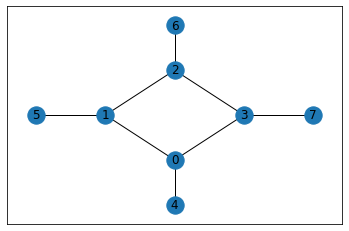

In [14]:
G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (2,3), (3,0), (0,4), (1,5), (2,6), (3,7)])

coordenadas = {0: (2,1), 1: (1,2), 2: (2,3), 3: (3,2), 4: (2,0), 5: (0,2), 6: (2,4), 7: (4,2)}
nx.draw_networkx(G, pos=coordenadas)

In [15]:
assert not es_power_dominating_set(G, set([1]))
assert not es_power_dominating_set(G, set([7]))
assert not es_power_dominating_set(G, set([4,6]))
assert es_power_dominating_set(G, set([0,2]))
assert es_power_dominating_set(G, set([4,5,6,7]))

Por último, usaremos la función <code>es_power_dominating_set</code> para minimalizar un conjunto dominante energético $D$. La idea es ir tirando vértices de $D$ hasta que $D$ deje de ser un conjunto dominante energético, ahí agregamos el último vértice tirado y retornamos.
1. Iterar sobre cada vértice $v$ de $D$, en orden ascendente de grado.
2. Eliminar $v$ de $D$.
3. Si $D$ no es un conjunto dominante energético, reinsertar a $v$ en $D$ y retornar $D$.

**Cuidado.** Python no permite iterar sobre un conjunto que va cambiando de tamaño, por lo que tenemos que hacernos una copia <code>D2</code> de <code>D</code>.

In [16]:
def minimalizar_pds(G, D):
    # Paso 1
    D2 = list(D)
    D2.sort(key=G.degree)
    for v in D2:
        # Paso 2
        D.remove(v)
        # Paso 3
        if not es_power_dominating_set(G,D):
            D.add(v)
            return D

In [17]:
minimalizar_pds(G, set([4,5,6,7]))

{6, 7}

In [18]:
minimalizar_pds(G, set([1,2,4,5,6,7]))

{1, 2}

### &#x1f4bb; Actividad 5

* Evalúe experimentalmente la efectividad del ajuste propuesto para la cota primal. Compare los tiempos de ejecución obtenidos (i) sin darle a CPLEX una solución inicial, (ii) dándole un conjunto dominante como solución inicial, (iii) dándole un conjunto dominante energético minimal como solución incial. Pruebe con al menos 5 grafos aleatorios diferentes para cada densidad de arista en {0.15, 0.5, 0.75} (use un número de vértices razonable y procure variar la semilla <code>seed</code> en la generación para construir grafos distintos).
* Analice los resultados obtenidos.